In [1]:
import os

import soundfile as sf

In [2]:
alignment_path = 'LibriSpeech/test-clean/61/70968/61-70968.alignment.txt'
data_root_dir = 'LibriSpeech/test-clean/'

In [3]:
# reader-id
# chapter-id

# decided through traversal
reader_id = '61'
chapter_id = '70968'

alignment_txt = f"{reader_id}-{chapter_id}.alignment.txt"
cur_dir = os.path.join(data_root_dir, reader_id, chapter_id)

In [4]:

with open(os.path.join(cur_dir, alignment_txt), 'r') as f:
    lines = f.readlines()


In [14]:
words = []
for line in lines:
    fn, ws, ts = line.split()

    fn = fn + '.flac'
    ws = ws[1: -1].split(',')
    ts = [0] + [float(t) for t in ts[1: -1].split(',')]
    ts = list(zip(ts[: -1], ts[1:]))
    assert len(ws) == len(ts)

    wav, sr = sf.read(os.path.join(cur_dir, fn))
    
    for w, t in zip(ws, ts):
        
        if w:    # not silence word
            print(w)
            start_t, end_t = t
            word = wav[int(start_t * sr): int(end_t * sr) + 1]
            words.append(word)

    
    break
    




HE
BEGAN
A
CONFUSED
COMPLAINT
AGAINST
THE
WIZARD
WHO
HAD
VANISHED
BEHIND
THE
CURTAIN
ON
THE
LEFT


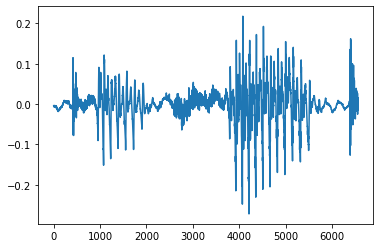

In [28]:
import matplotlib.pyplot as plt
from IPython.display import Audio

plt.plot(words[4])
itr = iter(range(20))

In [42]:
Audio(words[next(itr)], rate=sr)

In [34]:
Audio(wav, rate=sr)

In [7]:
# _, reader_ids, _ = next(os.walk(data_root_dir))
# for reader_id in reader_ids:
#     _, chapter_ids, _ = next(os.walk(os.path.join(data_root_dir, reader_id)))
#     for chapter_id in chapter_ids:
#         files = os.listdir...

'61-70968-0000 ",HE,BEGAN,A,CONFUSED,COMPLAINT,AGAINST,THE,WIZARD,,WHO,HAD,VANISHED,BEHIND,THE,CURTAIN,ON,THE,LEFT," "0.230,0.330,0.640,0.690,1.220,1.630,1.940,2.010,2.410,2.650,2.760,2.850,3.270,3.600,3.670,4.040,4.160,4.240,4.670,4.905" \n'